# A) API Zugriff im lokalen Netzwerk 

# A) Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

# B) Das ist dein Arbeitsauftrag: 
## ->Arbeitsaufgabe 1: "Dummy - Werte speichern"

### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "b_nachname_dummy_source" - file darin ab. Der Source-Code soll nur die notwendigen Bestandteile enthalten, um das geforderte .json und .db file anzulegen. Bitte kommentiere den Source-Code und alle individuellen Anpassungen! Füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die individuell angepassten dummy - Werte in einem .json File "b_nachname_dummywerte.json"
3. speichere die individuell angepassten dummy - Werte in einer sqlite Datenbank "b_nachname_dummywerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"

## ->Arbeitsaufgabe 2: "Sensor - Werte speichern"
Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.

### TODO: *Ersetze die "dummy-Werte" durch echte Sensordaten. Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "source" - file darin ab. Der Source-Code soll im Unterschied zu Arbeitsaufgabe 1 alle Code-Bestandteile von A1) bis A5) in ausgeführter Form beinhalten und zusätzlich die erforderlichen individuellen Anpassungen inkl. deiner Kommentare. Bitte füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die Sensor - Werte in einem .json File "b_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "b_nachname_sensorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 2 Nachname"



 

# Input zu Arbeitsaufgabe 1 und 2
### ACHTUNG: Die dummy-Werte für Arbeitsaufgabe 1 müssen individuell z.B. mittels Zufallsgenerator erzeugt werden!
### A1) request an das REST API senden und "return-object" analysieren

In [19]:
import requests
import json
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


TODO: 1 Schritt: IP Adresse des Sensors identifizieren! Dazu das Programm "Advanced IP Scanner " installieren
um die IP - Adressen aller Computer im Netzwerk abzufragen. 
Um einen geeigente IP - Range festzulegen, cmd starten - eigene IP Adresse (am Kabel abfragen) und IP - 100 bis IP + 100 scannen. 
Das Gerät ist ein Raspberry Pi und sollte im NW anhand des Namens entsprechend erkannt werden. 

In [20]:
my_temp_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_temperature'
my_hum_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_relative_humidity'
my_uv_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_ultraviolet'
my_lum_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_luminance'

In [21]:
hum_value=requests.get(my_hum_data)
temp_value=requests.get(my_temp_data)
uv_value = requests.get(my_uv_data)
lum_value = requests.get(my_lum_data)

In [22]:
hum_value.content
temp_value.content
uv_value.content
lum_value.content

b'{"link":"http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_luminance","state":"762","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"editable":true,"type":"Number","name":"ZWave_Node_005_Sensor_luminance","label":"Sensor (luminance)","category":"","tags":["Point"],"groupNames":[]}'

In [59]:
print(hum_value.encoding)

utf-8


### A2) dictionary mit json.loads aus dem "return-object" erzeugen

In [23]:
# json.loads requires the decoded bytestring (which is a string) as argument and returns a python dictionary
# .decode togethe with json.loads is optional
print(type(json.loads(hum_value.content.decode("utf-8"))))
print(type(json.loads(temp_value.content.decode("utf-8"))))
print(type(json.loads(uv_value.content.decode("utf-8"))))
print(type(json.loads(lum_value.content.decode("utf-8"))))

hum_dict = json.loads(hum_value.content.decode("utf-8"))
temp_dict = json.loads(temp_value.content.decode("utf-8"))
uv_dict = json.loads(uv_value.content.decode("utf-8"))
lum_dict = json.loads(lum_value.content.decode("utf-8"))

print(hum_dict)
print(temp_dict)
print(uv_dict)

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
{'link': 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_relative_humidity', 'state': '60', 'stateDescription': {'pattern': '%.1f', 'readOnly': True, 'options': []}, 'editable': True, 'type': 'Number', 'name': 'ZWave_Node_005_Sensor_relative_humidity', 'label': 'Sensor (relative humidity)', 'category': 'Humidity', 'tags': ['Point'], 'groupNames': []}
{'link': 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_temperature', 'state': '23.8 °C', 'stateDescription': {'pattern': '%.1f %unit%', 'readOnly': True, 'options': []}, 'editable': True, 'type': 'Number:Temperature', 'name': 'ZWave_Node_005_Sensor_temperature', 'label': 'Sensor (temperature)', 'category': 'Temperature', 'tags': ['Point'], 'groupNames': []}
{'link': 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_ultraviolet', 'state': '0', 'stateDescription': {'pattern': '%.1f', 'readOnly': True, 'options': []}, 'editable': True, 'type': 'Num

### A3) dekodierte Sensor - Messwerte mit "print" ausgeben

In [61]:
# The result - bytestring can be decoded and printed directly as a string without using json.loads , 
# however if you pass it as an argument into the "json-loads" function you can create a dictionary
print(type(hum_value.content.decode()))
print(temp_value.content.decode())

<class 'str'>
{"link":"http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_temperature","state":"25.2 °C","stateDescription":{"pattern":"%.1f %unit%","readOnly":true,"options":[]},"editable":true,"type":"Number:Temperature","name":"ZWave_Node_005_Sensor_temperature","label":"Sensor (temperature)","category":"Temperature","tags":["Point"],"groupNames":[]}


### A7

In [24]:
import pandas as pd
import random
import time
import sqlite3

my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity', 'uv', 'luminance'])
#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'eklein_sensor_values.sqlite3' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC , humidity NUMERIC, uv NUMERIC, luminance NUMERIC);''')

for my_counter in range(10):
    time.sleep(10)
    my_timestamp = round(time.time())
    act_temp = temp_dict['state'].strip("°C")
    act_hum = hum_dict['state']
    act_uv = uv_dict['state']
    act_lum = lum_dict['state']
    input_values = [my_timestamp,act_temp,act_hum, act_uv, act_lum]
    my_values_df.loc[my_counter]=input_values
# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_uv}, {act_lum})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()

filename = "eklein_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
pd.read_json(filename)

eklein_sensor_values.sqlite3
INSERT INTO sensor_values VALUES (1686293419, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293429, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293439, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293449, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293459, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293469, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293479, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293489, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293499, 23.8 , 60, 0, 762)
INSERT INTO sensor_values VALUES (1686293509, 23.8 , 60, 0, 762)


,timestamp,temperature,humidity,uv,luminance
0,2023-06-09 06:50:19,23.8,60,0,762
1,2023-06-09 06:50:29,23.8,60,0,762
2,2023-06-09 06:50:39,23.8,60,0,762
3,2023-06-09 06:50:49,23.8,60,0,762
4,2023-06-09 06:50:59,23.8,60,0,762
5,2023-06-09 06:51:09,23.8,60,0,762
6,2023-06-09 06:51:19,23.8,60,0,762
7,2023-06-09 06:51:29,23.8,60,0,762
8,2023-06-09 06:51:39,23.8,60,0,762
9,2023-06-09 06:51:49,23.8,60,0,762


In [ ]:
# fetch values directly from db cursor
cur.execute("SELECT * FROM sensor_values")
print(cur.fetchall())

In [17]:
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)

,timestamp,temperature,humidity,uv,luminance
0,1686293330,23.8,60,0,949
1,1686293331,23.8,60,0,949
2,1686293332,23.8,60,0,949
3,1686293333,23.8,60,0,949
4,1686293334,23.8,60,0,949
5,1686293335,23.8,60,0,949
6,1686293336,23.8,60,0,949
7,1686293337,23.8,60,0,949
8,1686293338,23.8,60,0,949
9,1686293339,23.8,60,0,949


timestamp      1.686293e+09
temperature    2.380000e+01
humidity       6.000000e+01
uv             0.000000e+00
luminance      7.620000e+02
Name: 0, dtype: float64
0:00:00
timestamp      1.686293e+09
temperature    2.380000e+01
humidity       6.000000e+01
uv             0.000000e+00
luminance      7.620000e+02
Name: 1, dtype: float64
0:00:10
timestamp      1.686293e+09
temperature    2.380000e+01
humidity       6.000000e+01
uv             0.000000e+00
luminance      7.620000e+02
Name: 2, dtype: float64
0:00:20
timestamp      1.686293e+09
temperature    2.380000e+01
humidity       6.000000e+01
uv             0.000000e+00
luminance      7.620000e+02
Name: 3, dtype: float64
0:00:30
timestamp      1.686293e+09
temperature    2.380000e+01
humidity       6.000000e+01
uv             0.000000e+00
luminance      7.620000e+02
Name: 4, dtype: float64
0:00:40
timestamp      1.686293e+09
temperature    2.380000e+01
humidity       6.000000e+01
uv             0.000000e+00
luminance      7.620000e+02


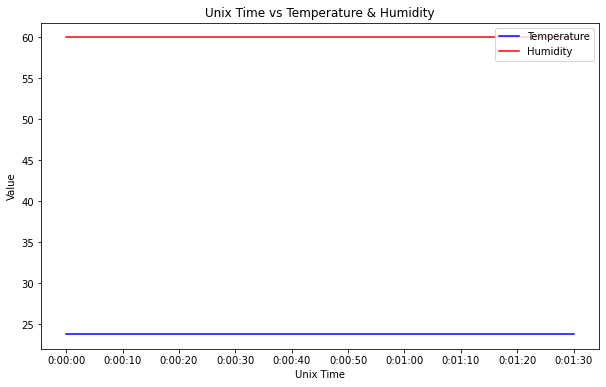

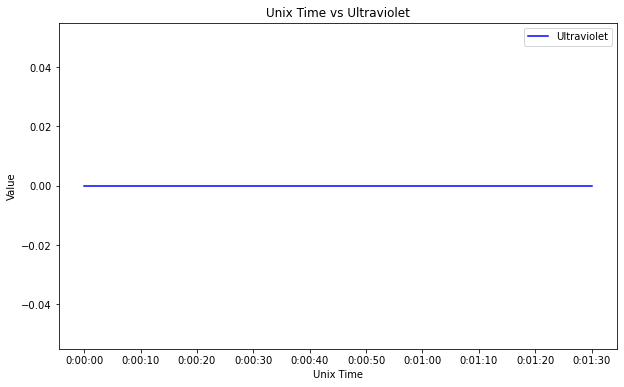

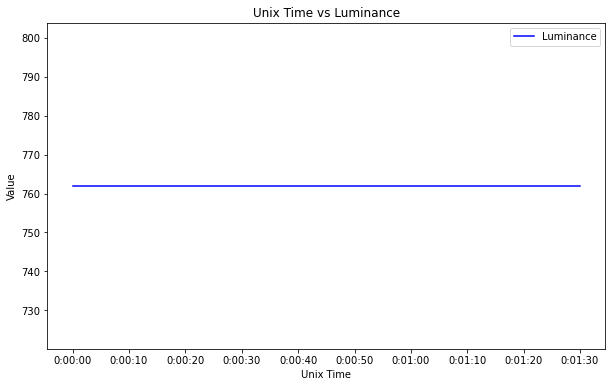

In [25]:
import matplotlib.pyplot as plt
import datetime
plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)

timestamps=[]
for i,row in plot_df.iterrows():
   print(row)
   first_time= plot_df.iloc[0]['timestamp']
   second_time= plot_df.iloc[i]['timestamp']  
   duration =  second_time - first_time
   calc_seconds=str(datetime.timedelta(seconds=duration))
   print(calc_seconds)
   timestamps.append(calc_seconds)


# Create the chart

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['temperature'], 'b', label='Temperature')
plt.plot(timestamps,plot_df['humidity'], 'r', label='Humidity')

plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Temperature & Humidity')
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['uv'], 'b', label='Ultraviolet')

plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Ultraviolet')
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['luminance'], 'b', label='Luminance')

plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Luminance')
plt.legend(loc='upper right')

plt.show()